In [1]:
from main import *
load('cp/cp_50')

torch.FloatTensor


Text(0.5, 1.0, 'tensor([[[0.0008]]], grad_fn=<SelectBackward0>)')

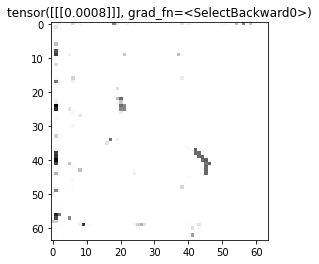

In [2]:
noise = torch.randn(64, NOISE_DIM, 1, 1, device=device)
imgs = generator(noise)
print(imgs.type())
plt.imshow(np.transpose(imgs[0].detach().cpu().numpy()), cmap='Greys_r')
plt.title(discriminator(imgs)[0])

In [3]:
black = torchvision.io.read_image('black.png', torchvision.io.ImageReadMode.GRAY).type(torch.FloatTensor) / 255
white = torchvision.io.read_image('white.png', torchvision.io.ImageReadMode.GRAY).type(torch.FloatTensor) / 255
dot = torchvision.io.read_image('dot.png', torchvision.io.ImageReadMode.GRAY).type(torch.FloatTensor) / 255

In [4]:
print(discriminator(dot[None,:,:,:]))
print(discriminator(black[None,:,:,:]))
print(discriminator(white[None,:,:,:]))


tensor([[[[4.2184e-12]]]], grad_fn=<SigmoidBackward0>)
tensor([[[[0.0137]]]], grad_fn=<SigmoidBackward0>)
tensor([[[[1.0933e-16]]]], grad_fn=<SigmoidBackward0>)


In [5]:
i = 0
for data in dataloader:
    ###########################
    # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
    ##########################

    # Train with all-real batch
    i += 1
    print(i)
    discriminator.zero_grad()
    real_cpu = data[0].to(device)
    b_size = real_cpu.size(0)
    label = torch.full((b_size,), 1, dtype=torch.float, device=device)
    output = discriminator(real_cpu).view(-1)
    # Calculate loss on all-real batch
    errD_real = criterion(output, label)
    errD_real.backward()

    # Calculate gradients for D in backward pass
    # errD_real.backward()
    
    # if i == 1:
        # print(discriminator.main[11].weight.grad) 
    D_x = output.mean().item()
    print(f'D_x: {D_x}')

    ## Train with all-fake batch
    # Generate batch of latent vectors
    noise = torch.randn(b_size, NOISE_DIM, 1, 1, device=device)
    # Generate fake image batch with G
    fake = generator(noise)
    label2 = torch.full((b_size,), 0, dtype=torch.float, device=device)
    # Classify all fake batch with D
    output = discriminator(fake.detach()).view(-1)
    # Calculate D's loss on the all-fake batch
    errD_fake = criterion(output, label2)
    errD_fake.backward()
    # Calculate the gradients for this batch, accumulated (summed) with previous gradients

    # errD_fake.backward()
    
    D_G_z = output.mean().item()
    print(f'D_G_z: {D_G_z}')
    # Compute error of D as sum over the fake and the real batches
    errD = errD_real + errD_fake
    # errD.backward()
    
    print(f'errD: {errD}')
    # print(f'errD_real: {errD_real}')
    # print(f'errD_fake: {errD_fake}')
    # Update D
    optimizerD.step()

    output = discriminator(real_cpu).view(-1) 
    D_x = output.mean().item()
    label.fill_(real_label)
    errD_real = criterion(output, label)
    print(f'D_x_1: {D_x}')
    fake = generator(noise)
    output = discriminator(fake.detach()).view(-1)
    D_G_z = output.mean().item()
    label.fill_(fake_label)
    errD_fake = criterion(output, label)
    errD = errD_real + errD_fake
    print(f'D_G_z_1: {D_G_z}')
    print(f'errD_1: {errD}')

    ############################
    # (2) Update G network: maximize log(D(G(z)))
    ###########################
    generator.zero_grad()
    label.fill_(real_label)  # fake labels are real for generator cost
    # Since we just updated D, perform another forward pass of all-fake batch through D
    output = discriminator(fake).view(-1)
    # Calculate G's loss based on this output
    errG = criterion(output, label)
    # Calculate gradients for G
    errG.backward()
    D_G_z2 = output.mean().item()
    # Update G
    # optimizerG.step()

1
D_x: 0.9984991550445557
D_G_z: 0.0012304288102313876
errD: 0.002751542953774333
D_x_1: 0.998519778251648
D_G_z_1: 0.0009770082542672753
errD_1: 0.002473482396453619
2
D_x: 0.9994224309921265
D_G_z: 0.0005753740551881492
errD: 0.001157314283773303
D_x_1: 0.999433696269989
D_G_z_1: 0.0005102349678054452
errD_1: 0.0010804221965372562
3
D_x: 0.998823881149292
D_G_z: 0.0004235907399561256
errD: 0.0016055635642260313
D_x_1: 0.9988800287246704
D_G_z_1: 0.0004046678659506142
errD_1: 0.0015300243394449353
4
D_x: 0.9991776943206787
D_G_z: 0.0012710716109722853
errD: 0.0021074246615171432
D_x_1: 0.9991810321807861
D_G_z_1: 0.0011033148039132357
errD_1: 0.0019329559290781617
5
D_x: 0.9983609914779663
D_G_z: 0.0008847809513099492
errD: 0.0025412843097001314
D_x_1: 0.9984483122825623
D_G_z_1: 0.0008249753154814243
errD_1: 0.00239200284704566
6
D_x: 0.9982617497444153
D_G_z: 0.0006348901079036295
errD: 0.0024089093785732985
D_x_1: 0.9984493255615234
D_G_z_1: 0.0006236677872948349
errD_1: 0.00220138